# Used Bike Prices – Feature Engineering & EDA Project


#### Import necessary dependencies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#### Load the Dataset and inspect the rows and columns

In [12]:
data = pd.read_csv("bikes.csv")
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


#### Basic Data Inspection

In [13]:
data.info()
data.isnull().sum()
data.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [14]:
data.duplicated().sum()

np.int64(0)

#### Feature Engineering

In [15]:
# add column age of bike = current year - model_year
data['bike_age'] = datetime.now().year - data['model_year']
data.head()


,model_name,model_year,kms_driven,owner,location,mileage,power,price,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,9
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,10
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,14
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,9
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,6


#### Exploratory Data Analysis (EDA)

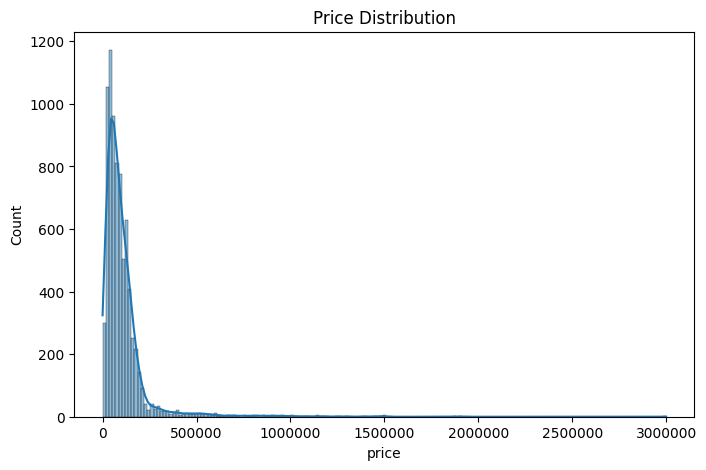

In [16]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['price'], kde=True)

plt.ticklabel_format(style='plain', axis='x')
plt.title('Price Distribution')
plt.show()


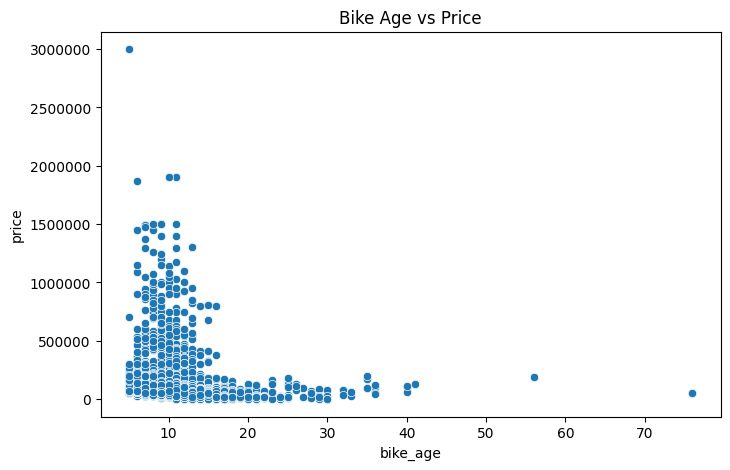

In [17]:
# Bike Age vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='bike_age', y='price', data=data)
plt.ticklabel_format(style='plain', axis='y')

plt.title('Bike Age vs Price')
plt.show()

In [18]:
# Top 10 Bike Models

data['model_name'].value_counts().head(10)


model_name
Royal Enfield Classic 350cc 2017        78
Royal Enfield Classic 350cc 2016        69
Royal Enfield Classic 350cc 2015        67
Royal Enfield Thunderbird 350cc 2015    63
Royal Enfield Classic 350cc 2018        59
Bajaj Avenger Street 150 2016           57
UM Renegade Commando 2017               54
Bajaj V15 150cc 2016                    51
Bajaj V15 150cc 2017                    49
Royal Enfield Classic 350cc 2014        49
Name: count, dtype: int64

#### Encoding Categorical Variables

In [19]:
le = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,bike_age
0,31,2017,410,0,236,40,109,63500,9
1,1113,2016,1338,0,236,40,114,115000,10
2,905,2012,279,0,236,35,161,300000,14
3,145,2017,1756,0,424,30,172,100000,9
4,924,2020,552,0,61,0,169,197500,6


#### Feature Selection

In [20]:
X = data.drop(columns=['price'])
y = data['price']



#### Train–Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Feature Scaling

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Baseline Model – Linear Regression

In [23]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression MSE: 10419777736.32264
Linear Regression R2: 0.2584474789798221


#### Random Forest Model (Before Tuning)

In [24]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 2495757085.096779
Random Forest R2: 0.8223824917247562


#### Hyperparameter Tuning using GridSearchCV 


In [25]:
# Define Parameter Grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


#### Apply GridSearchCV

In [26]:
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


#### Best Model & Evaluation

In [27]:
best_model = grid_search.best_estimator_

print("Best Parameters:")
print(grid_search.best_params_)

y_pred_best = best_model.predict(X_test)

print("Tuned Random Forest MSE:", mean_squared_error(y_test, y_pred_best))
print("Tuned Random Forest R2:", r2_score(y_test, y_pred_best))


Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest MSE: 2324813004.0777607
Tuned Random Forest R2: 0.8345482036469252


#### Model Comparison Summary

In [28]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Tuned Random Forest'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_best)
    ]
})

results


,Model,R2 Score
0,Linear Regression,0.258447
1,Random Forest,0.822382
2,Tuned Random Forest,0.834548


#### Business Insights

##### 1. Bike age is the strongest factor affecting resale price

##### 2. Kilometer driven has a significant negative impact on price

##### 3. Premium brands retain higher value even after multiple years

##### 4. Feature engineering improves model accuracy significantly

#### Conclusion

##### 1. The project demonstrates end-to-end data analysis workflow

##### 2. Feature engineering played a critical role in improving data quality

##### 3. Linear regression provided a strong baseline for price prediction

##### 4. Insights can help sellers and buyers make informed pricing decisions